In [8]:
import json
from pprint import pprint
from pathlib import Path

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import uproot
from scipy.stats import bootstrap, norm

In [10]:
from gsfanalysis.pandas_import import uproot_to_pandas

In [14]:
input_dir = Path("../test_12cmp_smeared//")

In [15]:
summary_short = uproot_to_pandas(uproot.open(str(input_dir / "root/tracksummary_gsf.root:tracksummary")))
len(summary_short)

9950

In [16]:
stat = np.std

In [17]:
def plot(dist, sample_mean, standard_error, confidence_interval=None, confidence_level=None):
    x = np.linspace(sample_mean + 4*standard_error, sample_mean - 4*standard_error)
    pdf = norm.pdf(x, loc=sample_mean, scale=standard_error)

    fig, ax = plt.subplots()
    ax.hist(dist, bins=25, density=True)
    ax.plot(x, pdf, label="µ={:.2f}, σ={:.4f}".format(sample_mean, standard_error), lw=5)
    ax.set_xlabel(stat.__name__)
    ax.set_ylabel('pdf')
    
    ymax = ax.get_ylim()[1]

    ax.vlines([sample_mean], ymin=0, ymax=ymax, color="tab:orange", lw=3, label="mean {:.3f}".format(sample_mean))
    ax.vlines([sample_mean + standard_error, sample_mean - standard_error], ymin=0, ymax=ymax, color="tab:orange", ls="--", label="standard error {:.3f}".format(standard_error))
    
    if not (confidence_interval is None or confidence_level is None):
        ax.vlines(confidence_interval, ymin=0, ymax=ymax, color="tab:orange", ls=":", label="confidence interval {:.1%}".format(confidence_level))
        
    ax.set_ylim(0, ax.get_ylim()[1]*1.3)

    ax.legend()

In [18]:
with open(input_dir / "config.json") as f:
    config = json.load(f)
    
#pprint(config)

In [19]:
conv_level = 0.95
res = bootstrap((summary_short["res_eQOP_fit"].to_numpy(),), stat, confidence_level=conv_level)
res.standard_error, res.confidence_interval

(0.045079242,
 ConfidenceInterval(low=0.10728545348341159, high=0.32397964458086975))

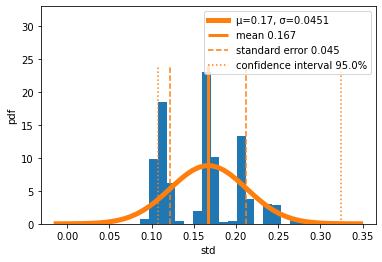

In [20]:
sample_mean = stat(summary_short["res_eQOP_fit"])

plot(res.bootstrap_distribution, sample_mean, res.standard_error, res.confidence_interval, conv_level)